In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_courses = pd.read_csv('./data/ga_course_info.csv')
df_general = pd.read_csv('./data/ga_scrape_info.csv')

In [3]:
print(df_courses.shape)
print(df_general.shape)

(15, 2)
(32, 8)


In [4]:
df_courses.head()

,course,description
0,Software Engineering Immersive,Developed with guidance from our software engi...
1,User Experience Design Immersive,Developed with guidance from our User Experien...
2,Data Science Immersive,Data science has topped LinkedIn’s Emerging Jo...
3,Digital Marketing Immersive,Developed with insights from our global networ...
4,Software Engineering Immersive Remote Flex,Developed with guidance from our software engi...


In [5]:
df_general.head()

,city,state,country,address,phone number,email,full-time courses,part-time courses
0,Atlanta,Georgia,USA,"675 Ponce De Leon Avenue NE, 2nd FloorAtlanta,...",+1 (404) 334-7858,atlanta@generalassemb.ly,"['Software Engineering Immersive', 'Data Scien...","['Product Management', 'Front-End Web Developm..."
1,Austin,Texas,USA,"600 Congress Avenue, 14th FloorAustin, TX 78701",+1 (512) 823-0359,austin@generalassemb.ly,"['Software Engineering Immersive', 'Data Scien...","['Product Management', 'Front-End Web Developm..."
2,Boston,Massachusetts,USA,"125 Summer Street\r\n\r\n\r\n13th FloorBoston,...",+1 (617) 207-6245,boston@generalassemb.ly,"['Software Engineering Immersive', 'Data Scien...","['Product Management', 'Front-End Web Developm..."
3,Denver,Colorado,USA,"3858 Walnut StDenver, CO 80205",+1 (303) 963-9936,denver@generalassemb.ly,"['Software Engineering Immersive', 'Data Scien...","['Product Management', 'Front-End Web Developm..."
4,Detroit,Michigan,USA,NaN,+1 (917) 722-0237,detroit@generalassemb.ly,"['Software Engineering Immersive', 'Data Scien...","['Product Management', 'Front-End Web Developm..."


# EDA

In [6]:
x = df_general['country'].value_counts().index
height = df_general['country'].value_counts()

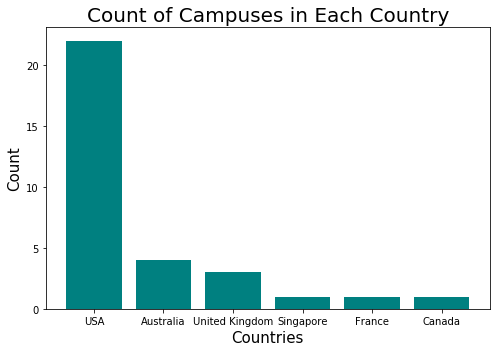

In [7]:
plt.figure(figsize = (7,5))
plt.bar(x, height, color = 'teal')
plt.title('Count of Campuses in Each Country', fontsize=20)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout();

In [8]:
x_contact = ['address', 'phone number', 'email']
height_contact = [df_general['address'].count(), df_general['phone number'].count(), df_general['email'].count()]

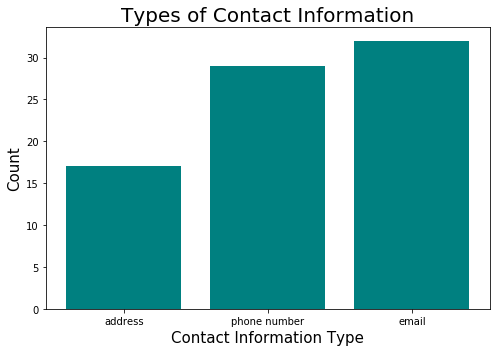

In [9]:
plt.figure(figsize = (7,5))
plt.bar(x_contact, height_contact, color = 'teal')
plt.title('Types of Contact Information', fontsize=20)
plt.xlabel('Contact Information Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout();

In [10]:
sei = 0
uxi = 0
dsi = 0
dmi = 0
for course in df_general['full-time courses']:
    if 'software engineering immersive' in course.lower():
        sei += 1
    if 'user experience design immersive' in course.lower():
        uxi += 1
    if 'data science immersive' in course.lower():
        dsi += 1
    if 'digital marketing immersive' in course.lower():
        dmi += 1
prog_count = [sei, uxi, dsi, dmi]
prog_count

[32, 32, 32, 1]

In [11]:
x_ftcourse = ['Software Engineering Immersive', 'Data Science Immersive', 'User Experience Design Immersive', 'Digital Marketing Immersive']

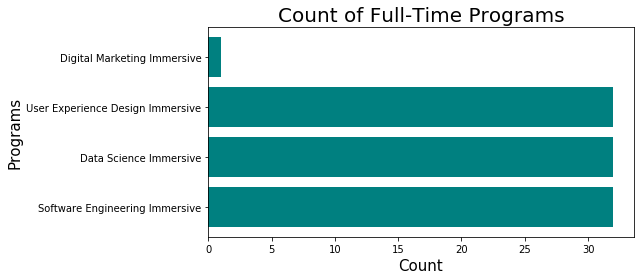

In [12]:
plt.figure(figsize = (9,4))
plt.barh(x_ftcourse, prog_count, color = 'teal')
plt.title('Count of Full-Time Programs', fontsize=20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Programs', fontsize = 15)
plt.tight_layout();

In [13]:
pt_courses = []
for row in range(0, len(df_general['part-time courses'])):
    for i in df_general['part-time courses'][row].split("'"):
        if i not in pt_courses:
            pt_courses.append(i)
pt_courses.remove('[')
pt_courses.remove(', ')
pt_courses.remove(']')

In [14]:
all_pt_courses = []
for c in df_general['part-time courses']:
    for d in range(0, len(pt_courses)):
        if pt_courses[d] in c:
            all_pt_courses.append(pt_courses[d])

In [15]:
pt_count = {}
for item in range(0, len(pt_courses)):
    counts = all_pt_courses.count(pt_courses[item])
    pt_count[pt_courses[item]] = counts
pt_count

{'Product Management': 32,
 'Front-End Web Development': 32,
 'JavaScript Development': 32,
 'Python Programming': 32,
 'React Development': 28,
 'Data Analytics': 32,
 'Data Science': 32,
 'User Experience Design': 32,
 'Visual Design': 30,
 'Digital Marketing': 32}

In [16]:
y_ptcourse = [k for k, v in pt_count.items()]
x_ptcourse = [v for k, v in pt_count.items()]

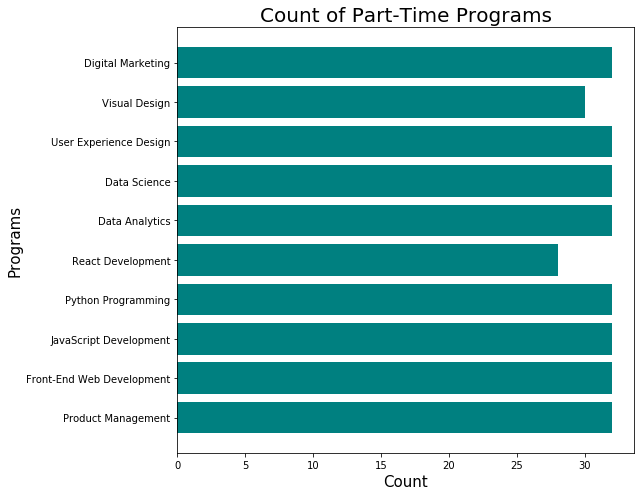

In [17]:
plt.figure(figsize = (9,7))
plt.barh(y_ptcourse, x_ptcourse, color = 'teal')
plt.title('Count of Part-Time Programs', fontsize=20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Programs', fontsize = 15)
plt.tight_layout();